In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
alignment_scores=pd.read_csv('../../data/alignment_scores.csv',index_col=0)
alignment_scores

,chr_id,scf_id,upstream_score,numt_score,downstream_score
0,14.0,GL019308,-2445.0,-455.0,-5001.0
1,14.0,GL018741,-1801.0,42.0,-1602.0
2,14.0,GL018705,-1768.0,105.0,-1395.0
3,14.0,GL018706,-1764.0,63.0,-1540.0
4,14.0,GL018706,-1936.0,-86.0,-1651.0
...,...,...,...,...,...
392,19.0,AAGW02081404,-1696.0,-226.0,-1770.0
393,19.0,GL019311,-1617.0,-302.0,-1638.0
394,21.0,GL019308,-3643.0,-307.0,-4999.0
395,21.0,GL019326,-1602.0,-140.0,-1625.0


In [76]:
def dataprep(row):
    global merged
    merged.append([row['chr_id'],row['scf_id'],'upstream flanking',row['upstream_score']])
    merged.append([row['chr_id'],row['scf_id'],'numt',row['numt_score']])
    merged.append([row['chr_id'],row['scf_id'],'downstream flanking',row['downstream_score']])
    
merged=[]    
alignment_scores.apply(dataprep,axis=1)
df=pd.DataFrame(merged)
df.columns=['chr_id','scf_id','region','Alignment score']
df['chr_id']=df['chr_id'].apply(lambda chr_id:str(int(chr_id)))
df

,chr_id,scf_id,region,Alignment score
0,14,GL019308,upstream flanking,-2445.0
1,14,GL019308,numt,-455.0
2,14,GL019308,downstream flanking,-5001.0
3,14,GL018741,upstream flanking,-1801.0
4,14,GL018741,numt,42.0
...,...,...,...,...
1186,21,GL019326,numt,-140.0
1187,21,GL019326,downstream flanking,-1625.0
1188,21,AAGW02081404,upstream flanking,-1594.0
1189,21,AAGW02081404,numt,77.0


(-5500.0, 5000.0)

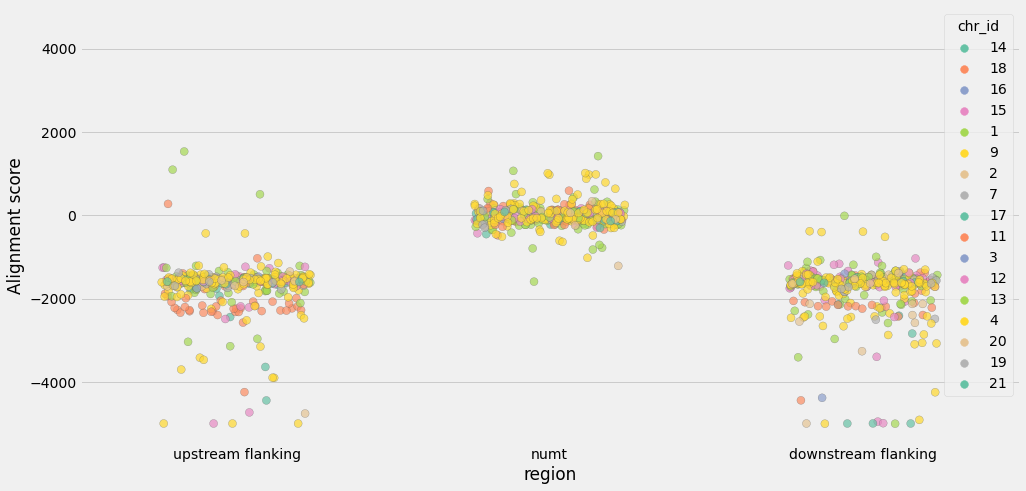

In [116]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(1,1,figsize=(15,7.5))

ax=sns.stripplot(
    x='region',y='Alignment score',data=df,
    linewidth=.3,
    color=".25",
    size=8,
    hue='chr_id',
    palette="Set2",
    alpha=.7,
    jitter=.24
)
ax.set_ylim(-5500,5000)